In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rainbow_extractor import ELAsTiCC_lightcurve
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import build_classifier as bc

SN_like_dict = {'111':'Ia', '112':'Ib', '113':'II', '114':'Iax', '115':'91bg',\
                   '131':'SLSN', '132':'TDE', '135':'PISN'}

In [ ]:
train = pd.read_pickle('features/training.pkl')
test = pd.read_pickle('features/testing.pkl')

In [ ]:
train2 = train[(train['type'] != '135') & (train['bolometric']==train['bolometric'])]
test2 = test[(test['type'] != '135') & (test['bolometric']==test['bolometric'])]

In [117]:
train2 = train2[train2['lc'].apply(lambda x: x.rising)]
test2 = test2[test2['lc'].apply(lambda x: x.rising)]

In [118]:
balanced_train = bc.balance_alerts(train2)
X_train, y_train = bc.X_y(balanced_train, lc_only=False)

balanced_test = bc.balance_alerts(test2)
X_test, y_test = bc.X_y(balanced_test, lc_only=False)

In [119]:
Counter(balanced_train['type'])

Counter({'111': 10773,
         '112': 10773,
         '113': 10773,
         '114': 10773,
         '115': 10773,
         '131': 10773,
         '132': 10773})

In [120]:
clf = RandomForestClassifier(n_estimators=200, random_state=0,
                             max_depth=20, min_samples_leaf=0.0001, n_jobs=10)#

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=0.0001, n_estimators=200,
                       n_jobs=10, random_state=0)

In [121]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8290700295712827
0.567509308250049


In [122]:
predictions = clf.predict(X_test)

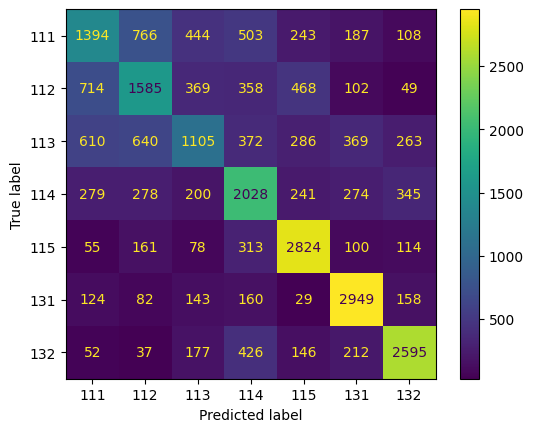

In [123]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

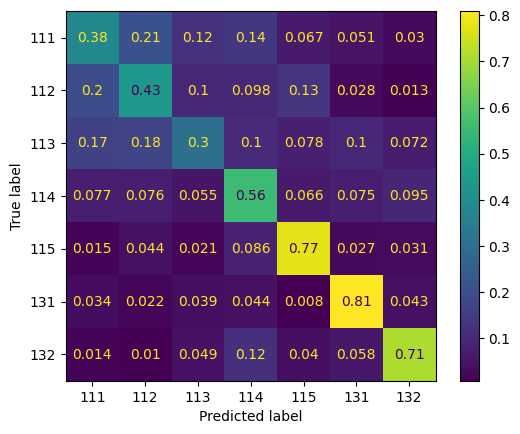

In [126]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

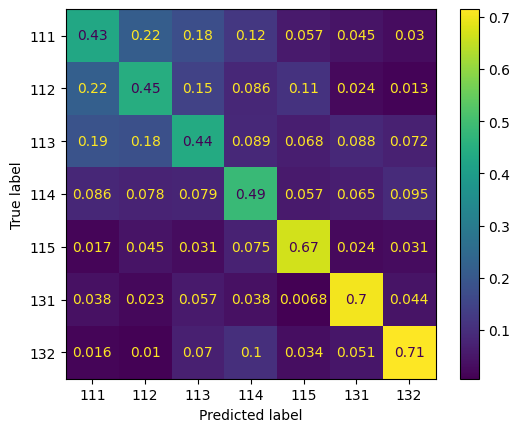

In [127]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [136]:
train3 = train2[train2['lc'].apply(lambda x: x.rising)]
test3 = test2[test2['lc'].apply(lambda x: x.rising)]

train3.loc[train3['type'] != '111', 'type'] = '0'
test3.loc[test3['type'] != '111', 'type'] = '0'

In [141]:
balanced_train = bc.balance_alerts(train3)
X_train, y_train = bc.X_y(balanced_train, lc_only=False)

balanced_test = bc.balance_alerts(test3)
X_test, y_test = bc.X_y(balanced_test, lc_only=False)

Counter(y_train)

Counter({'0': 14066, '111': 14066})

In [142]:
clf = RandomForestClassifier(n_estimators=200, random_state=0,
                             max_depth=20, min_samples_leaf=0.0001, n_jobs=10)#
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=0.0001, n_estimators=200,
                       n_jobs=10, random_state=0)

In [143]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9552111474477464
0.7585084033613445


In [144]:
predictions = clf.predict(X_test)

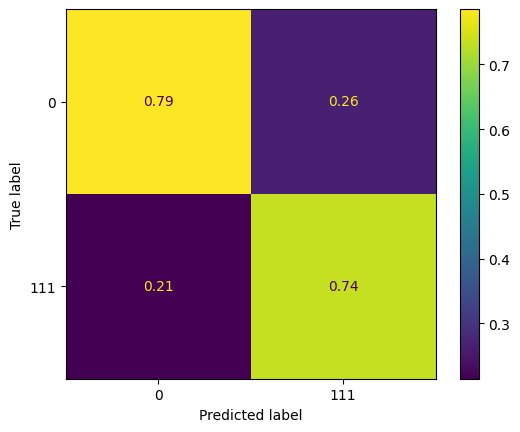

In [145]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [139]:
sw = features.iloc[:, -10]
bins = np.linspace(0, 100, 100)
plt.figure(figsize=(12, 8))

for classe in ['111', '112', '131']:
    sc = sw[(sw != 999) & (data['type']==classe)]
    plt.hist(sc, bins=bins, alpha=.7, density=True, label=SN_like_dict.get(classe));
    
plt.legend()
plt.title(sw.name)

NameError: name 'features' is not defined